<a href="https://colab.research.google.com/github/habib-roy/google-colab-source-code/blob/master/edge_sharpen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.morphology import opening, disk, closing
from google.colab import drive

In [2]:
def auto_canny(image, sigma=0.33):
    # compute the median of the single channel pixel intensities
    v = np.median(image)

    # apply automatic Canny edge detection using the computed median
    lower = int(max(0, (1.0 - sigma) * v))
    upper = int(min(255, (1.0 + sigma) * v))
    edged = cv2.Canny(image, lower, upper)

    # return the edged image
    return edged

In [3]:
def equalize(img):
    ycrcb = cv2.cvtColor(img, cv2.COLOR_BGR2YCR_CB)
    channels = cv2.split(ycrcb)
    cv2.equalizeHist(channels[0], channels[0])
    cv2.merge(channels, ycrcb)
    cv2.cvtColor(ycrcb, cv2.COLOR_YCR_CB2BGR, img)
    return img

Mounted at /content/drive


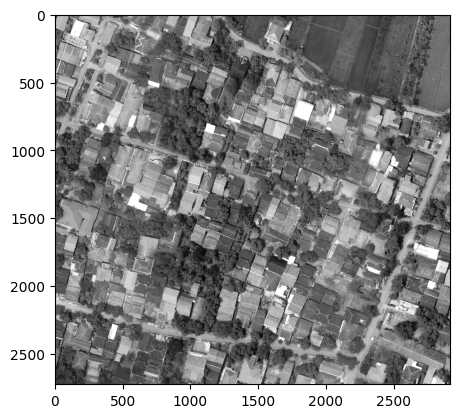

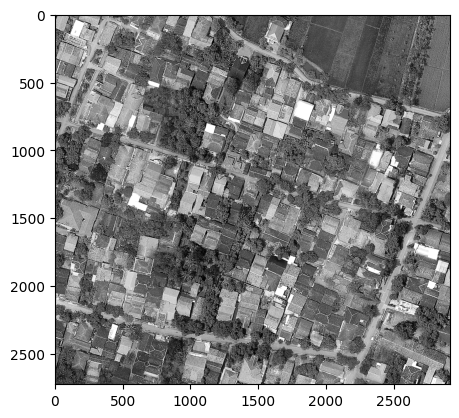

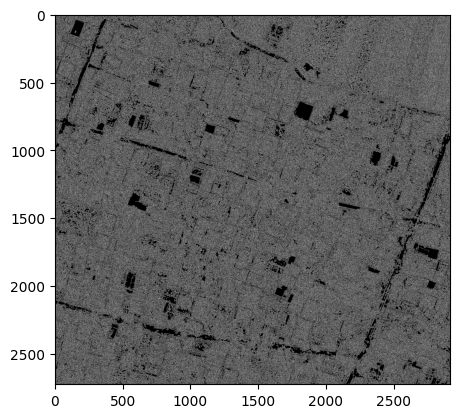

In [5]:
drive.mount('/content/drive')
image = '/content/drive/MyDrive/Kuliah S2/Semester 1/Computer Vision/content/desa_sungapan_clip_1.tif'
img = cv2.imread(image)
# imm = equalize(img)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')
blur = cv2.bilateralFilter(gray, 5, 75, 75)
kernel_sharp = np.array((
         [-2, -2, -2],
         [-2, 17, -2],
         [-2, -2, -2]), dtype='int')
im = cv2.filter2D(blur, -1, kernel_sharp)
plt.figure()
plt.imshow(im, cmap='gray')
canny = auto_canny(im)
plt.figure()
plt.imshow(canny, cmap='gray')
plt.show()